In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import jieba.posseg as psg

from wordcloud import WordCloud
from collections import Counter

In [2]:
raw_data=pd.read_csv('./comment.csv')
raw_data.head()

,机型,IMEI,日期,类别,描述
0,X Flip,f4d3c8815c34764f6a39ddf816106424,2023-4-28,续航赛道,需要我过去做什么么？或者我转账给你你闪送来;卡针有没有;带个卡针;尾款多少;中国联通大厦北门...
1,X Flip,6ef41eaacea279abdb33606f13ef5d3f,2023-4-28,内置程序,左边这个吧;现在都可;711便利店门口等哈;好;在哪？;发照片给我看看;这里只有左拐;这里只...
2,X Flip,23d3f4919208d9414173c58c0869f47b,2023-4-28,内置程序,主题不错
3,X Flip,839735255dfbf22029d39a83712e5623,2023-4-28,内置程序,imei码：*** 1、问题现象及复现步骤：X Flip外屏上面没有小红书，很多软件都没有，...
4,X Flip,dd6330b527a900c07a3186214c6c4478,2023-4-28,性能赛道,这样么;哈哈哈还有一个视频没过去呢;咱俩还视频嘛;网卡;好;然后嘞;这样么;这样;么;需要插...


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   机型      13 non-null     object
 1   IMEI    13 non-null     object
 2   日期      13 non-null     object
 3   类别      13 non-null     object
 4   描述      13 non-null     object
dtypes: object(5)
memory usage: 652.0+ bytes


In [4]:
raw_data.columns

Index(['机型', 'IMEI', '日期', '类别', '描述'], dtype='object')

In [5]:
for cate in ['机型', 'IMEI', '日期', '类别', '描述']:
    raw_data[cate].value_counts()

In [6]:
reviews=raw_data.copy()
print(reviews.shape[0])

13


In [7]:
content = reviews['描述'].astype(str) 
info=re.compile('[0-9a-zA-Z]|手机')
content=content.apply(lambda x: info.sub('',x)) 

In [8]:
seg_content=content.apply( lambda s:  [(x.word,x.flag) for x in psg.cut(s)] )  
n_word=seg_content.apply(lambda s: len(s))

n_word.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\WINDOWS\TEMP\jieba.cache
Loading model cost 0.620 seconds.
Prefix dict has been built successfully.


0     68
1    504
2      2
3    143
4     45
Name: 描述, dtype: int64

In [9]:
n_content=[ [x+1]*y for x,y in zip(list(seg_content.index),list(n_word))] 
index_content_long=sum(n_content,[])
len(index_content_long)

1108

In [10]:
seg_content.head()
seg_content_long=sum(seg_content,[])

word_long=[x[0] for x in seg_content_long]

nature_long=[x[1] for x in seg_content_long]

len(seg_content_long)

1108

In [11]:
review_long=pd.DataFrame({'index_content':index_content_long, 'word':word_long, 'nature':nature_long})

In [12]:
review_long['nature'].unique()

array(['v', 'r', 't', 'y', 'x', 'c', 'p', 'nrt', 'q', 'n', 'm', 'nt',
       'ns', 'nr', 'd', 'ul', 'uj', 'uz', 'a', 'e', 'f', 's', 'u', 'j',
       'l', 'vn', 'nz', 'o', 'vd', 'zg', 'ng', 'b', 'ug'], dtype=object)

In [13]:
review_long_clean=review_long[review_long['nature']!='x']
review_long_clean.shape

(809, 3)

In [14]:
stop_path=open('./stoplist.txt','r',encoding='UTF-8')
stop_words=stop_path.readlines()

stop_words[0:5]

['\ufeff \n', '说\n', '人\n', '元\n', 'hellip\n']

In [15]:
stop_words=[word.strip('\n') for word in stop_words]
stop_words[0:5]

['\ufeff ', '说', '人', '元', 'hellip']

In [16]:
word_long_clean=list(set(word_long)-set(stop_words))

review_long_clean=review_long_clean[review_long_clean['word'].isin(word_long_clean)]
review_long_clean.shape

(369, 3)

In [17]:
n_word=review_long_clean.groupby('index_content').count()['word']

index_word=[ list(np.arange(1,x+1)) for x in list(n_word)] 
index_word_long=sum(index_word,[])

len(index_word_long)

369

In [18]:
review_long_clean['index_word']=index_word_long
review_long_clean.head()

,index_content,word,nature,index_word
3,1,做,v,1
9,1,转账,v,2
13,1,闪,v,3
14,1,送来,v,4
16,1,卡针,nrt,5


In [19]:
review_long_clean.to_csv('./1_review_long_clean.csv', encoding='gbk')

In [20]:
review_long_clean.head()

,index_content,word,nature,index_word
3,1,做,v,1
9,1,转账,v,2
13,1,闪,v,3
14,1,送来,v,4
16,1,卡针,nrt,5


In [21]:
n_review_long_clean=review_long_clean[[ 'n' in nat for nat in review_long_clean.nature]]
n_review_long_clean.shape
n_review_long_clean.head()

,index_content,word,nature,index_word
16,1,卡针,nrt,5
21,1,卡,n,7
22,1,针,n,8
24,1,尾款,n,9
27,1,中国联通,nt,10


In [22]:
n_review_long_clean.nature.value_counts()
n_review_long_clean.to_csv('./1_n_review_long_clean.csv', encoding='gbk')

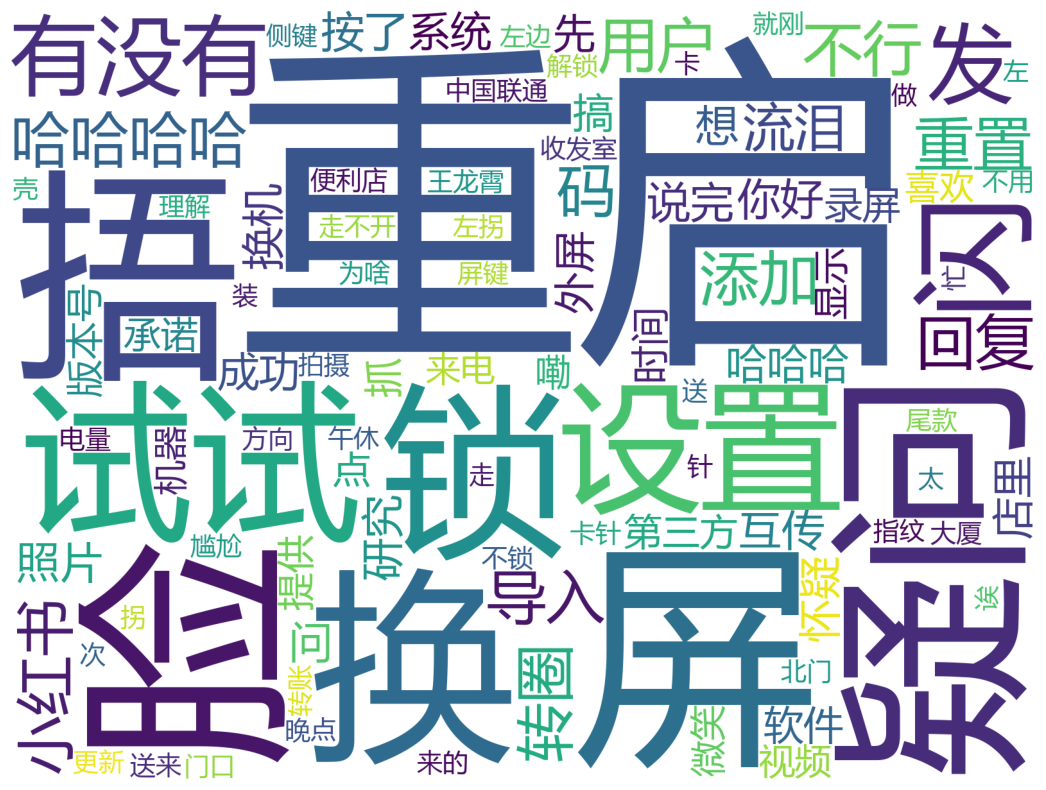

In [23]:
font=r"C:\Windows\Fonts\msyh.ttc"

wordcloud = WordCloud(font_path=font, max_words = 100, background_color='white', width=1600, height=1200, mode='RGBA')
wordcloud.generate_from_frequencies(Counter(review_long_clean.word.values))
wordcloud.to_file('总词云图.png')

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [24]:
pos_comment = pd.read_csv('./正面评价词语（中文）.txt', header=None, sep=',', encoding='utf-8')
neg_comment = pd.read_csv('./负面评价词语（中文）.txt', header=None, sep=',', encoding='utf-8') 
pos_emotion = pd.read_csv('./正面情感词语（中文）.txt', header=None, sep=',', encoding='utf-8') 
neg_emotion = pd.read_csv('./负面情感词语（中文）.txt', header=None, sep=',', encoding='utf-8')

In [25]:
r_pos_comment = np.transpose(pos_comment)
r_neg_comment = np.transpose(neg_comment)
r_pos_emotion = np.transpose(pos_emotion)
r_neg_emotion = np.transpose(neg_emotion)

In [26]:
pos=pd.concat([r_pos_comment,r_pos_emotion],axis=0)
neg=pd.concat([r_neg_comment,r_neg_emotion],axis=0)

In [27]:
positive = pos
positive.columns=['review']
positive['weight']=pd.Series([1]*len(positive))
positive.head()

,review,weight
0,侻,1
1,俶傥,1
2,僄,1
3,劼,1
4,嫕,1


In [28]:
negative = neg
negative.columns=['review']
negative['weight']=pd.Series([-1]*len(negative))
negative.head()

,review,weight
0,僄,-1
1,啰啰唆唆,-1
2,啰啰嗦嗦,-1
3,啰里啰唆,-1
4,啰里啰嗦,-1


In [29]:
pos_neg=pd.concat([positive,negative],axis=0)
pos_neg.shape

(8976, 2)

In [30]:
data=review_long_clean.copy()
review_mltype=pd.merge(data,pos_neg,how='left',left_on='word',right_on='review')
review_mltype.shape

review_mltype=review_mltype.drop(['review'],axis=1)
review_mltype=review_mltype.replace(np.nan,0)
review_mltype.head()

,index_content,word,nature,index_word,weight
0,1,做,v,1,0.0
1,1,转账,v,2,0.0
2,1,闪,v,3,0.0
3,1,送来,v,4,0.0
4,1,卡针,nrt,5,0.0


In [31]:
notdict=pd.read_csv('./not.csv')
notdict.shape

notdict['freq']=[1]*len(notdict)
notdict.head()

,term,freq
0,不,1
1,没,1
2,无,1
3,非,1
4,莫,1


In [32]:
review_mltype['amend_weight']=review_mltype['weight']
review_mltype['id']=np.arange(0,review_mltype.shape[0])
review_mltype.head()

,index_content,word,nature,index_word,weight,amend_weight,id
0,1,做,v,1,0.0,0.0,0
1,1,转账,v,2,0.0,0.0,1
2,1,闪,v,3,0.0,0.0,2
3,1,送来,v,4,0.0,0.0,3
4,1,卡针,nrt,5,0.0,0.0,4


In [33]:
only_review_mltype=review_mltype[review_mltype['weight']!=0]
only_review_mltype.index=np.arange(0,only_review_mltype.shape[0]) #索引重置
only_review_mltype.shape
only_review_mltype.head()

,index_content,word,nature,index_word,weight,amend_weight,id
0,2,很慢,a,141,-1.0,-1.0,162
1,2,慢,a,151,-1.0,-1.0,172
2,2,厉害,a,154,1.0,1.0,175
3,5,辛苦,a,9,1.0,1.0,250
4,11,喜欢,v,1,1.0,1.0,344


In [34]:
index=only_review_mltype['id']

for i in range(0,only_review_mltype.shape[0]):
    
    review_i=review_mltype[review_mltype['index_content']==only_review_mltype['index_content'][i]]
    review_i.index=np.arange(0,review_i.shape[0])
    word_ind = only_review_mltype['index_word'][i]
    
    if word_ind==2:
        ne=sum( [ review_i['word'][word_ind-1] in notdict['term']  ] )
        if ne==1:
            review_mltype['amend_weight'][index[i]] = -( review_mltype['weight'][index[i]] )  
    elif word_ind > 2:
        ne=sum( [ word in notdict['term'] for word in review_i['word'][[word_ind-1,word_ind-2]]  ] )
        if ne==1:
            review_mltype['amend_weight'][index[i]]=- ( review_mltype['weight'][index[i]] )

In [35]:
emotion_value=review_mltype.groupby('index_content',as_index=False)['amend_weight'].sum()
emotion_value.to_csv('./1_emotion_value.csv',index=True,header=True,encoding='gbk')

In [36]:
content_emotion_value=emotion_value.copy()
content_emotion_value.shape
content_emotion_value=content_emotion_value[content_emotion_value['amend_weight']!=0]
content_emotion_value['ml_type']=''
content_emotion_value['ml_type'][content_emotion_value['amend_weight']>0]='pos'
content_emotion_value['ml_type'][content_emotion_value['amend_weight']<0]='neg'

content_emotion_value.shape
content_emotion_value.head()

C:\Windows\Temp\ipykernel_23092\2575679148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_emotion_value['ml_type'][content_emotion_value['amend_weight']>0]='pos'
C:\Windows\Temp\ipykernel_23092\2575679148.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_emotion_value['ml_type'][content_emotion_value['amend_weight']<0]='neg'


,index_content,amend_weight,ml_type
1,2,-1.0,neg
4,5,1.0,pos
10,11,1.0,pos
11,12,1.0,pos


In [37]:
content_emotion_value=content_emotion_value.drop(['amend_weight'],axis=1)
review_mltype=pd.merge(review_mltype,content_emotion_value,how='left',left_on='index_content',right_on='index_content')

review_mltype.to_csv('./1_review_mltype.csv',index=True,header=True,encoding='gbk')

In [38]:
data=review_mltype.copy()
data=data[data['amend_weight']!=0]

word_data_pos=data[data['ml_type']=='pos']
word_data_neg=data[data['ml_type']=='neg']

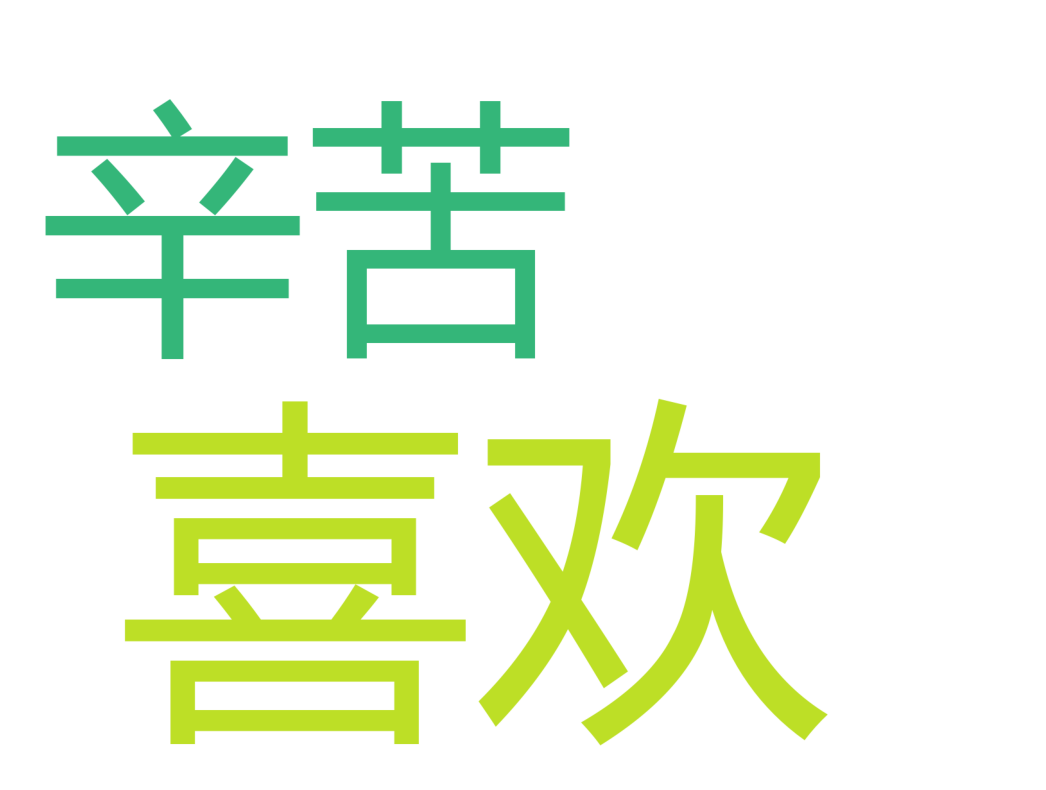

In [39]:
font=r"C:\Windows\Fonts\msyh.ttc"

wordcloud = WordCloud(font_path=font, max_words = 100, background_color='white', width=1600, height=1200, mode='RGBA')
wordcloud.generate_from_frequencies(Counter(word_data_pos.word.values))
wordcloud.to_file('感情好.png')

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

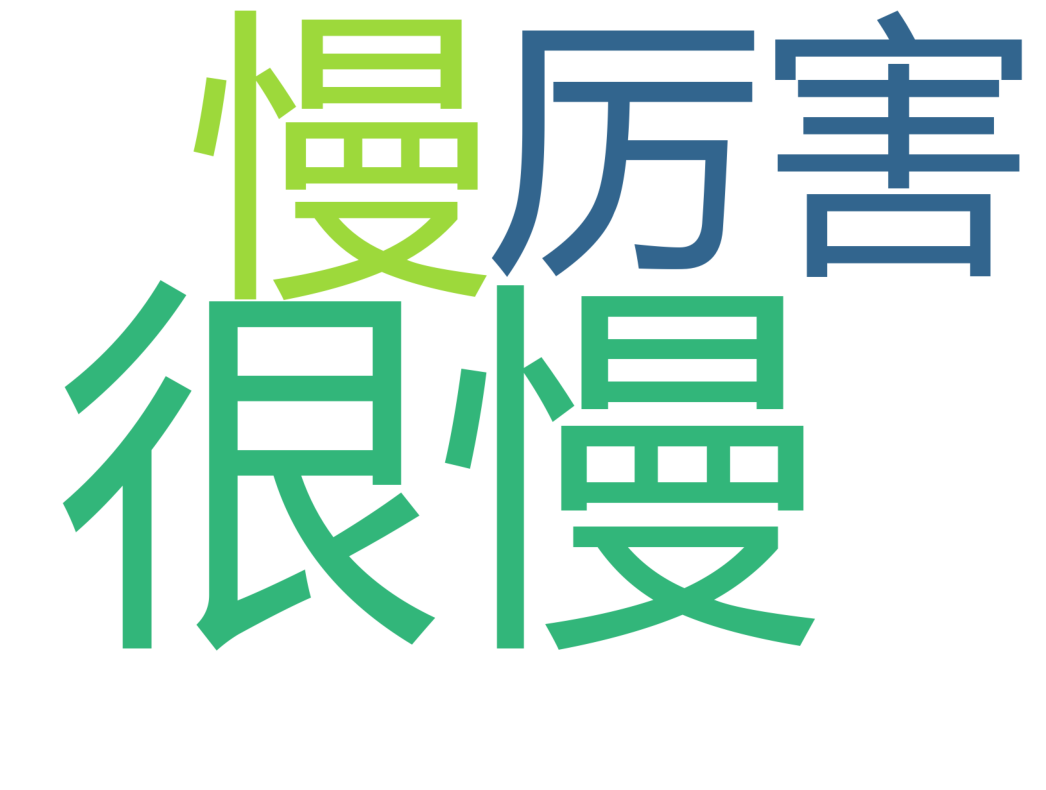

In [40]:
font=r"C:\Windows\Fonts\msyh.ttc"

wordcloud = WordCloud(font_path=font, max_words = 100, background_color='white', width=1600, height=1200, mode='RGBA')
wordcloud.generate_from_frequencies(Counter(word_data_neg.word.values))
wordcloud.to_file('感情差.png')

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

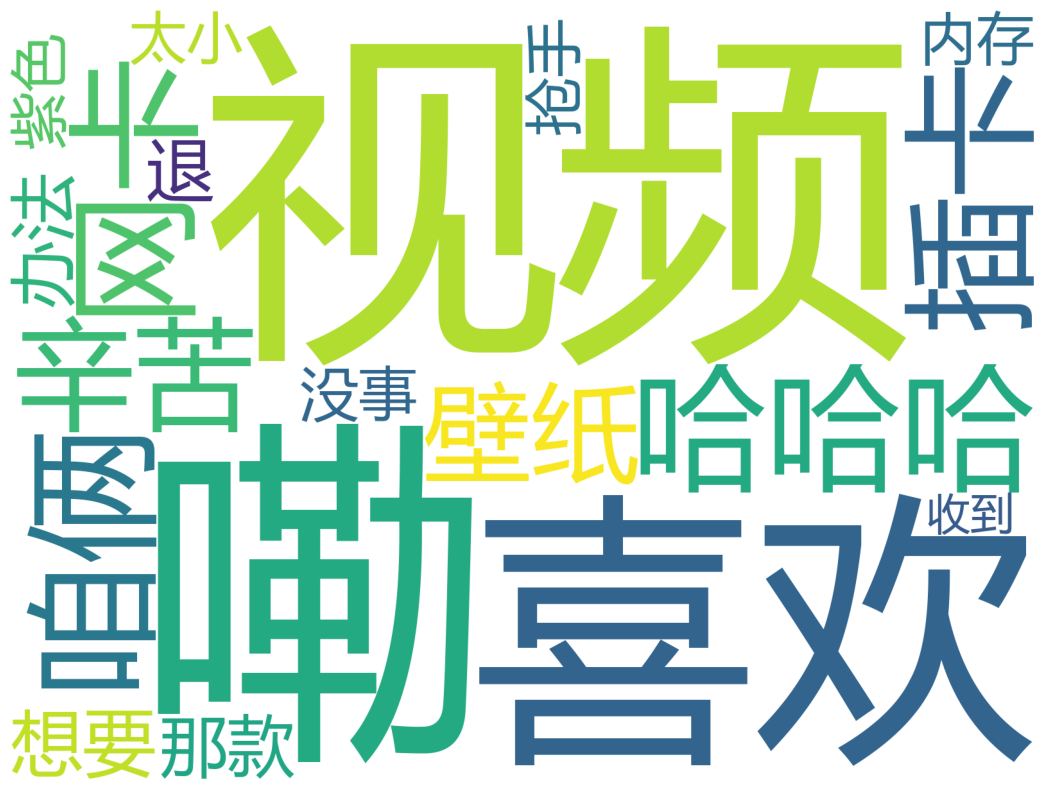

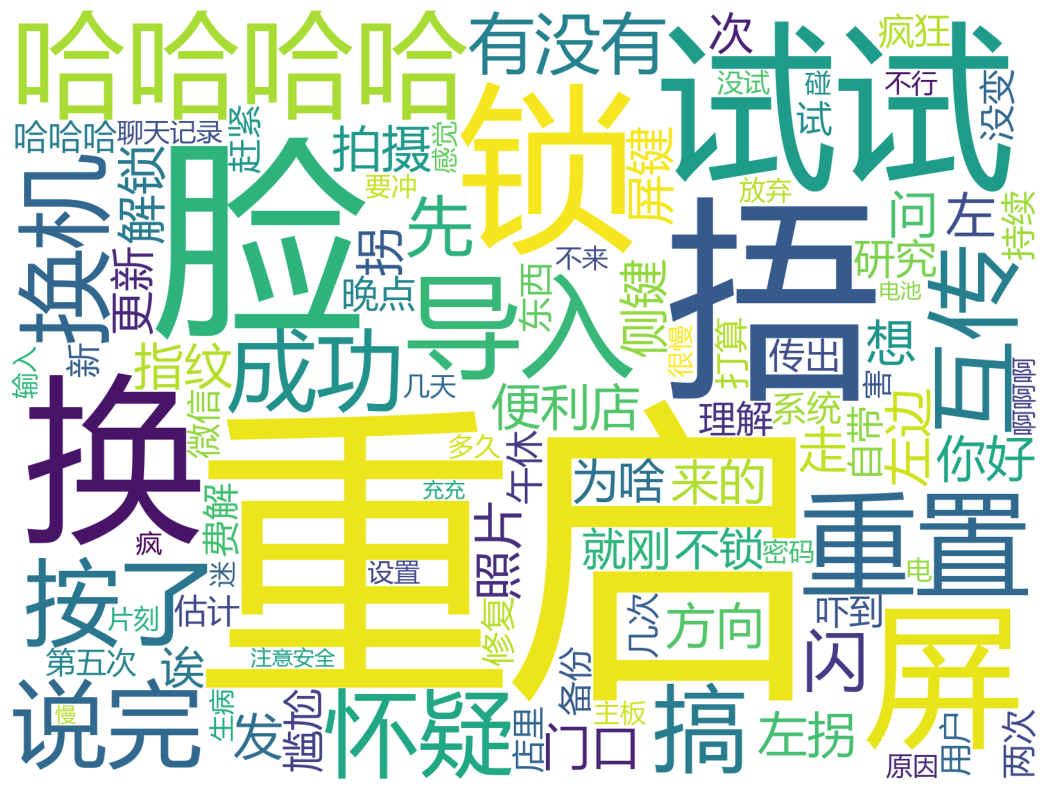

In [41]:
data=review_mltype.copy()

word_data_pos=data[data['ml_type']=='pos']
word_data_neg=data[data['ml_type']=='neg']

font=r"C:\Windows\Fonts\msyh.ttc"

wordcloud = WordCloud(font_path=font, max_words = 100, background_color='white', width=1600, height=1200, mode='RGBA')
wordcloud.generate_from_frequencies(Counter(word_data_pos.word.values))
wordcloud.to_file('评价好.png')

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

wordcloud = WordCloud(font_path=font, max_words = 100, background_color='white', width=1600, height=1200, mode='RGBA')
wordcloud.generate_from_frequencies(Counter(word_data_neg.word.values))
wordcloud.to_file('评价差.png')

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()